# SOLN
welcome to the last python workshop of this series! we will be talking about HAPI (Heliophysics Data Application Programmer's Interface). [here](http://hapi-server.org) is their website if you're curious. HAPI allowes you to pull data from missions and other sources. 

## setup

run `pip install hapiclient` and `pip install hapiplot` in your terminal


In [1]:
from hapiclient import hapi
from hapiplot import hapiplot

In [2]:
help(hapi)

Help on function hapi in module hapiclient.hapi:

hapi(*args, **kwargs)
    Request data from a HAPI server.

    Version: 0.2.6


    Examples
    ----------
    `Jupyter Notebook <https://colab.research.google.com/drive/11Zy99koiE90JKJ4u_KPTaEBMQFzbfU3P?usp=sharing>`_

    Parameters
    ----------
    server: str
        A string with the URL to a HAPI compliant server. (A HAPI URL         always ends with ``/hapi``).
    dataset: str
        A string specifying a dataset from a `server`
    parameters: str
        A comma-separated list of parameters in `dataset`
    start: str
        The start time of the requested data
    stop: str or None
        The end time of the requested data; end times are exclusive - the
        last data record returned by a HAPI server should have a timestamp
        before `start`. If `None`, `stopDate` is used.
    options: dict
            `logging` (``False``) - Log to console

            `cache` (``True``) - Save responses and processed response

In [3]:
help(hapiplot)

Help on function hapiplot in module hapiplot.hapiplot:

hapiplot(*args, **kwargs)
    Plot response from HAPI server.

    Version: 0.2.2

    Demos
    -----
    <https://github.com/hapi-server/client-python/blob/master/hapiclient/plot/hapiplot_test.py>


    Usage
    -----
            data, meta = hapiplot(server, dataset, params, start, stop, **kwargs)
        or
            meta = hapiplot(data, meta, **kwargs)
        where data and meta are return values from `hapi()`.

        All parameters are plotted. If a parameter has a bins attribute,
        it is plotted using `heatmap()`. Otherwise, it is plotted using
        `timeseries()`.

    Returns
    -------
        `data` is the same as that returned from `hapi()`.
        `meta` is the same as that returned from `hapi()` with the additon of

        meta['parameters'][i]['hapiplot']['figure'] is a reference to the
            figure (e.g., plt.gcf()). Usage example:

            >>> fig = meta['parameters'][i]['hapiplot']['f

## data

let's look at an event from 10/28/2021 15:35 UTC. there was an X1 flare and CME. let's get some data and see what it looks like.
data comes as an `ndarray` of single continous stream of time series data.

In [5]:

server = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset = 'OMNI2_H0_MRG1HR'

start = '2021-10-25T00:00:00Z'
stop = '2021-12-01T00:00:00Z'

parameters = 'DST1800,Proton_QI1800'    # convention to get parameters from hapi

opts = {'logging': True, 'usecache': True, 'cachedir': './hapicache' }

# get the data and metadata
data, meta = hapi(server, dataset, parameters, start, stop, **opts)


hapi(): Running hapi.py version 0.2.6
hapi(): file directory = ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Writing OMNI2_H0_MRG1HR___.json 
hapi(): Writing OMNI2_H0_MRG1HR___.pkl 
hapi(): Reading https://cdaweb.gsfc.nasa.gov/hapi/capabilities
hapi(): Writing https://cdaweb.gsfc.nasa.gov/hapi/data?id=OMNI2_H0_MRG1HR&parameters=DST1800,Proton_QI1800&time.min=2021-10-25T00:00:00Z&time.max=2021-12-01T00:00:00Z&format=binary to OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.bin
hapi(): Reading and parsing OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.bin
hapi(): Writing ./hapicache/cdaweb.gsfc.nasa.gov_hapi/OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.pkl
hapi(): Writing ./hapicache/cdaweb.gsfc.nasa.gov_hapi/OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.npy


In [6]:
display(meta)

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR',
 'contact': 'J.H. King, N. Papitashvili @ ADNET, NASA GSFC',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'DST1800',
   'description': 'Dst - 1-hour Dst index (1963/001-2014/366), Provisional Dst (2021/001-2024/304), Quick-look Dst (2024/305-2025/176), from WDC Kyoto (half-hour midpoint)',
   'units': 'nT',
   'type': 'integer',
   'fill': '99999'},
  {'name': 'Proton_QI1800',
   'description': 'Solar wind (magnetic energy density)/(kinetic energy density) (half-hour midpoint)',
   'units': ' ',
   'type': 'double',
   'fill': '9.9999'}],
 'startDate': '1963-01-01T00:00:00Z',
 'stopDate': '2025-07-24T16:00:00Z',
 'status': {'code': 1200, 'message': 'OK'},
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'OMNI2_H0_MRG1HR',
 'x_parameters': 'DST1800,Proton_QI1800',
 'x_time.min': '2021-10-25T00:00:00Z',


## plotting

now that we have data, we need to make plots to see what it looks like. we will use `hapiplot` instead of `matplotlib`.

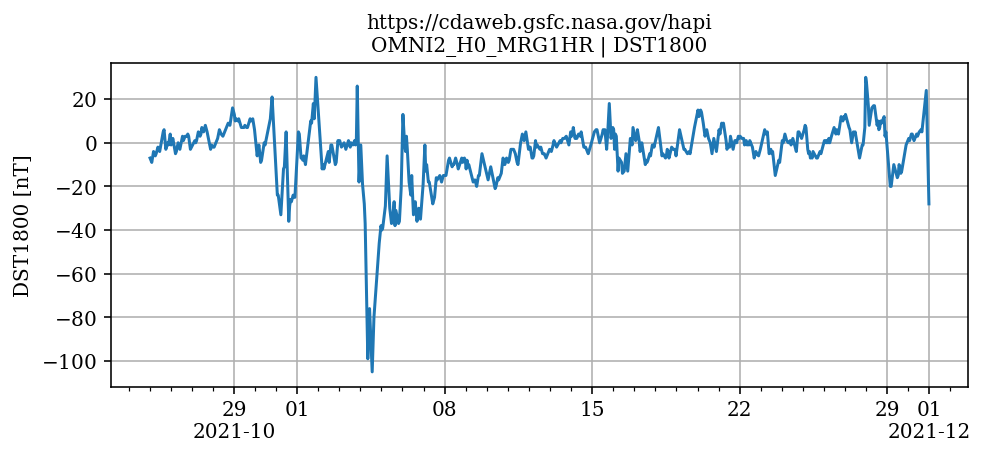

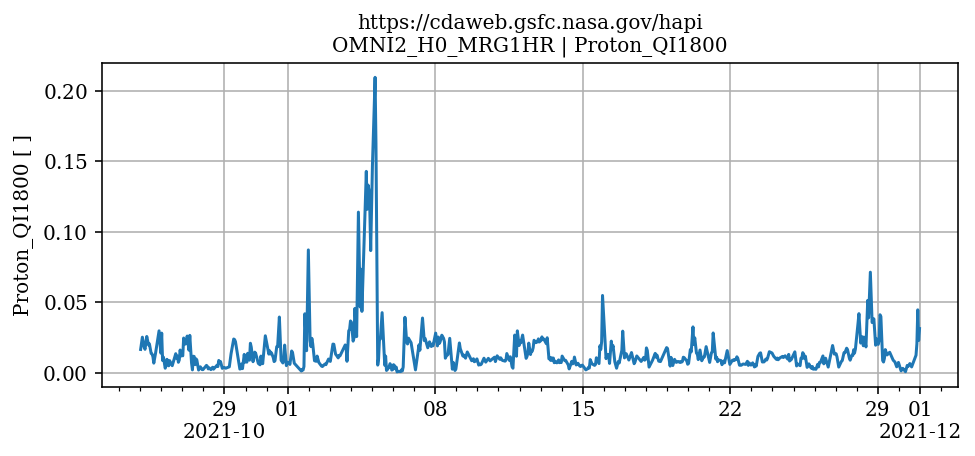

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR',
 'contact': 'J.H. King, N. Papitashvili @ ADNET, NASA GSFC',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'DST1800',
   'description': 'Dst - 1-hour Dst index (1963/001-2014/366), Provisional Dst (2021/001-2024/304), Quick-look Dst (2024/305-2025/176), from WDC Kyoto (half-hour midpoint)',
   'units': 'nT',
   'type': 'integer',
   'fill': '99999',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'Proton_QI1800',
   'description': 'Solar wind (magnetic energy density)/(kinetic energy density) (half-hour midpoint)',
   'units': ' ',
   'type': 'double',
   'fill': '9.9999',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}}],
 'startDate': '1963-01-01T00:00:00Z',
 'stopDate': '2025-07-24T16:00:00Z',
 'status': {'code': 1200, 'message': 'OK'},
 'x_server': 'https://cdaweb.gsfc.nasa

In [7]:
hapiplot(data, meta)


tutorial created by Komal Kaur, adapted from [PyHC](https://github.com/heliophysicsPy/summer-school-24/tree/main/hapi-tutorial)